In [148]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

In [149]:
main_image = cv2.imread("pexels/Background/pexels-anthony-132474.jpg")
main_image2 = main_image.copy()

In [150]:

tile_size = (96, 96)
main_image.shape

(3456, 5184, 3)

In [151]:
def main_image_feature(main_image,posI,posJ):
    image_tile = main_image[posI:posI+tile_size[0],posJ:posJ+tile_size[1]].mean(axis = (0,1))
    for i in range(posI,posI+tile_size[0],1):
        for j in range(posJ,posJ+tile_size[1],1):
            main_image[i,j] = image_tile
    return image_tile

            

In [152]:
for i in range(0,int(main_image.shape[0]/tile_size[0]),1):
    for j in range(0,int(main_image.shape[1]/tile_size[1]),1):
        main_image_feature(main_image,i*tile_size[0],j*tile_size[1])
main_image
    


array([[[124, 134, 125],
        [124, 134, 125],
        [124, 134, 125],
        ...,
        [144, 192, 163],
        [144, 192, 163],
        [144, 192, 163]],

       [[124, 134, 125],
        [124, 134, 125],
        [124, 134, 125],
        ...,
        [144, 192, 163],
        [144, 192, 163],
        [144, 192, 163]],

       [[124, 134, 125],
        [124, 134, 125],
        [124, 134, 125],
        ...,
        [144, 192, 163],
        [144, 192, 163],
        [144, 192, 163]],

       ...,

       [[ 65,  43,  51],
        [ 65,  43,  51],
        [ 65,  43,  51],
        ...,
        [102, 104,  98],
        [102, 104,  98],
        [102, 104,  98]],

       [[ 65,  43,  51],
        [ 65,  43,  51],
        [ 65,  43,  51],
        ...,
        [102, 104,  98],
        [102, 104,  98],
        [102, 104,  98]],

       [[ 65,  43,  51],
        [ 65,  43,  51],
        [ 65,  43,  51],
        ...,
        [102, 104,  98],
        [102, 104,  98],
        [102, 104,  98]]

Text(0.5, 1.0, 'main_image2')

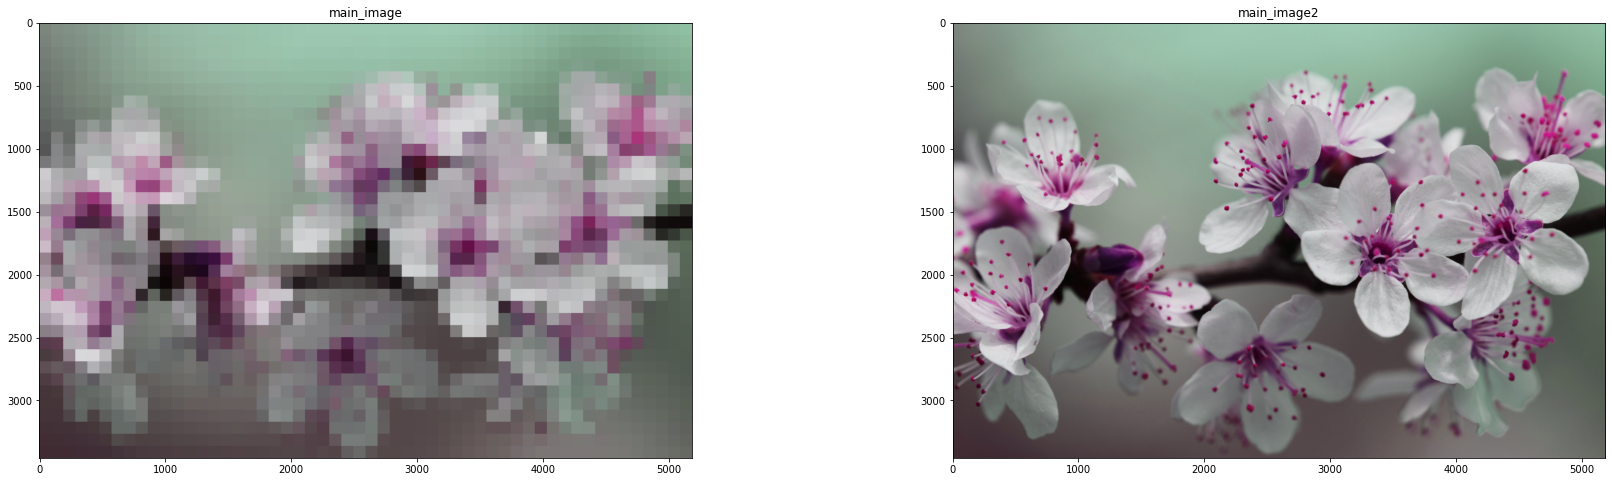

In [153]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.imshow(main_image)
plt.title('main_image')
plt.subplot(1,2,2)
plt.imshow(main_image2)
plt.title('main_image2')

In [154]:
All_files = glob.glob("pexels/*/*.jpg")

In [155]:
tiles = []
for i in All_files:
    try:
        tile=cv2.imread(i)
        resized = cv2.resize(tile, tile_size, interpolation = cv2.INTER_AREA)
        tiles.append(tile)
    except:
        print(f"filename = {i}")

filename = pexels\Background\pexels-björn-austmar-þórsson-7267852.jpg
filename = pexels\Background\pexels-cátia-matos-1072179.jpg
filename = pexels\Background\pexels-martin-péchy-1255149.jpg
filename = pexels\Background\pexels-toa-heftiba-şinca-1194420.jpg
filename = pexels\Background\pexels-tomáš-malík-3591557.jpg
filename = pexels\Background\pexels-tuấn-kiệt-jr-1382731.jpg
filename = pexels\Background\pexels-全-记录-4330697.jpg
filename = pexels\Healthy_Collection\pexels-jéshoots-3679.jpg
filename = pexels\Healthy_Collection\pexels-jéshoots-4815.jpg
filename = pexels\Healthy_Collection\pexels-miguel-á-padriñán-806427.jpg
filename = pexels\SeaScape\pexels-matheus-guimarães-611328.jpg
filename = pexels\SeaScape\pexels-oliver-sjöström-1122416.jpg
filename = pexels\SeaScape\pexels-tobias-bjørkli-1940037.jpg


In [ ]:
# Create array of average (mean) color of each tile image
Tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0,1))
    Tile_features.append(mean_color)

In [ ]:
Tile_features

In [ ]:
tree = spatial.KDTree(Tile_features)

In [ ]:
#KNN (k=1) search for best matched tiles with each subimage

closest = tree.query(main_image)
print(closest[1])
for i in range(main_image.shape[0]):
    for j in range(main_image.shape[1]):
        main_image[i, j] = Tile_features[closest[1][i][j]]

In [ ]:
closest2 = tree.query(main_image[0][126])
print(closest2[1])

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
plt.imshow(main_image)
plt.title('main_image')

In [ ]:
def tile_image_feature(main_image,posI,posJ):
    closest = tree.query(main_image[posI,posJ])
    tile = tiles[closest[1]]
    for i in range(posI,posI+tile_size[0],1):
        for j in range(posJ,posJ+tile_size[1],1):
            main_image[i,j] = tile[i-posI,j-posJ]

In [ ]:
for i in range(0,int(main_image.shape[0]/tile_size[0]),1):
    for j in range(0,int(main_image.shape[1]/tile_size[1]),1):
        tile_image_feature(main_image,i*tile_size[0],j*tile_size[1])
main_image
    

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
plt.imshow(main_image)
plt.title('main_image')

In [ ]:
main_image